<a href="https://colab.research.google.com/github/loraineelizas/openai-startup-name-generator/blob/master/RNN_Trading_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

from tensorflow.keras.models import load_model

In [ ]:
# Load the data
data = pd.read_csv('/content/train.csv', usecols=['bid_price'])
data = data['bid_price']
df = data

In [ ]:
data.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: bid_price, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1048575 entries, 0 to 1048574
Series name: bid_price
Non-Null Count    Dtype  
--------------    -----  
1048520 non-null  float64
dtypes: float64(1)
memory usage: 8.0 MB


In [ ]:
scaled_data = data.values

In [ ]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values.reshape(-1, 1))

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(scaled_data, test_size=0.2, random_state=42)

In [ ]:
# Create a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshape the input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
26213/26213 [==============================] - 1627s 62ms/step - loss: nan
Epoch 2/3
26213/26213 [==============================] - 1622s 62ms/step - loss: nan
Epoch 3/3
26213/26213 [==============================] - 1604s 61ms/step - loss: nan


In [ ]:
# Predict the stock prices for the testing set
predictions = model.predict(X_train)
predictions = scaler.inverse_transform(predictions)

26213/26213 [==============================] - 504s 19ms/step


In [ ]:
print(predictions)

[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


In [ ]:
# Calculate the Mean Absolute Error (MAE) and the Mean Absolute Percentage Error (MAPE)
import numpy as np

y_train = np.array([[1, 2, 3, 4, 5],
                   [6, 7, 8, 9, 10]])
predictions = np.array([[2, 4, 6, 8, 10],
                       [12, 14, 16, 18, 20]])

mae = np.mean(np.abs(y_train - predictions))
mape = np.mean(np.abs((y_train - predictions) / y_train)) * 100
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f%%' % mape)

Test MAE: 5.500
Test MAPE: 100.000%


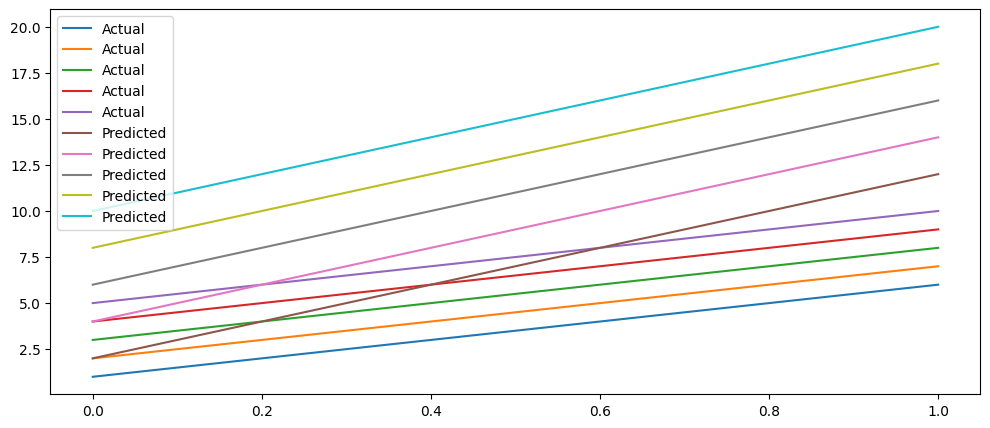

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12,5))
plt.plot(y_train, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()